# Lending Club Case Study

 
 ### About this case study
Lending Club is a financial services company that offer peer-to-peer lending services. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. 

In this case study we analyse the data that contains historical information about loan applicants from lending club and look closely at whether they defaulted or not. 

The aim is to study features in the data set identify patterns which indicate if a person is likely to default. These finding may then be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

## Case study begins
<hr/>

We will use python to understand, clean and analyse the data.

In [2]:
# Import python libraries used for this project

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 100
pd.options.display.max_rows = 150
pd.options.display.max_colwidth = 200

sns.set_palette('viridis')
sns.set_style("whitegrid", {'axes.facecolor': '#e9f0f7', 'grid.color': 'white'})

#### There are four major parts of this study:

 1. [Data Understanding](#1.-Data-Understanding)
 2. [Data Cleaning](#2.-Data-Cleaning)
 3. [Data Analysis](#3.-Data-Analysis)
 4. [Recommendations](#4.-Recommendations)

## 1. Data Understanding
<hr/>


In [3]:
# Load the historical loan data
df_loan = pd.read_csv('loan.csv', low_memory=False)

# Load data dictionary
df_dict = pd.read_excel('Data_Dictionary.xlsx')

We will use these data to perform our analsys. We will try to get an intial understanding of the given dataset by looking at its shape and some of the rows in the dataset. We will also look at the data dictionary that contain detail about the columns of the dataset.

#### 1.1 Preview loan data

In [4]:
# Take quick peek into ths loan data
print("Shape:", df_loan.shape)

Shape: (39717, 111)


In [5]:
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money be...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077175,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1076863,"Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & central A/C need to be replace. I'm very sorry to let my loan expired last time.<br>",other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,

In [6]:
df_loan.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=92187,Our current gutter system on our home is old and in need of repair. We will be using the borrowed funds to replace the gutter system on our home.,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,0.0,0.0,13,0,7274,13.10%,40,f,0.0,0.0,2822.969293,1213.88,2500.0,322.97,0.0,0.0,0.0,Jul-10,80.90,NaN,Jun-10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=90665,The rate of interest and fees incurred by carrying a balance on my credit card are so outrageous at this point that continuing to pay them is patently bad financial thinking. I wish to redirect m...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,5.0,0.0,6,0,8847,26.90%,9,f,0.0,0.0,9913.491822,1020.51,8500.0,1413.49,0.0,0.0,0.0,Jul-10,281.94,NaN,Jul-10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=90395,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,0.0,0.0,11,0,9698,19.40%,20,f,0.0,0.0,5272.161128,1397.12,5000.0,272.16,0.0,0.0,0.0,Apr-08,0.00,NaN,Jun-07,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=90376,NaN,other,JAL Loan,208xx,MD,3.72,0,Nov-88,0,0.0,0.0,17,0,85607,0.70%,26,f,0.0,0.0,5174.198551,672.66,5000.0,174.20,0.0,0.0,0.0,Jan-08,0.00,NaN,Jun-07,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

##### Observations
- There are **39717** rows and **111** columns in this dataset
- This seems like high-dimensional dataset and might have one or more features that aren't important for this analysis 
- First impression is that this dataset might by somewhat noisy (like **null values**) and will need cleaning up

#### 1.2 View the data dictionary

In [7]:
# Uncomment below to view
df_dict[~df_dict.LoanStatNew.isnull()]

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


The field **loan_status** seems critical because it determines whether the loan defaulted or not. So this is our target variable. From the description this is likely a categorical variable so lets look at all possible values for this field.

In [8]:
df_loan['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

Note: Since our goal is to analyse what features of the dataset make it likely for the borrower to either be a defaulter or non-defaulter we will have to remove all current loans during data cleaning stage.

## 2. Data Cleaning
<hr/>

Define some utility functions that we will be used on this section

In [9]:
# Drop all rows that meets given condition from the df in-place
def drop_rows(df, condition):
    print("Shape of dataframe before dropping rows:", df.shape)
    df.drop(df[condition].index, axis = 0, inplace=True)
    print("Shape of dataframe after dropping rows:", df.shape)
    
def drop_rows_with_null_columns(df, columns):
    print("Shape of dataframe before dropping rows:", df.shape)
    df.dropna(subset=columns, inplace=True)
    print("Shape of dataframe after dropping rows:", df.shape)
    
# Drops given columns in-place and prints some relevant information
def drop_columns(df, cols):
    print("Shape of dataframe before dropping columns:", df.shape)
    df.drop(cols, axis = 1, inplace=True)
    print("Shape of dataframe after dropping columns:", df.shape)
    print("Specified columns have been dropped!")
    
# Returns columns with % of null values more than or equal to min_pct
def get_columns_by_null_pct(df, min_pct):
    cols_null_pct = df.isnull().mean() * 100
    return cols_null_pct[cols_null_pct >= min_pct].index.tolist()

# Returns columns with any null values
def get_columns_with_any_null(df):
    cols_null_pct = df.isnull().sum()
    return cols_null_pct[cols_null_pct > 0]

# Use data dictionary to get description for given column names
def describe_columns(column_names):
    return df_dict[df_dict.LoanStatNew.apply(lambda x: x in column_names)]

# Returns list of all columns that has all unique values
def get_unique_values_columns(df):
    unique_columns = df.columns[df.nunique() == len(df)].tolist()
    return unique_columns

# Returns list of all columns that has only single value
def get_single_value_columns(df):
    unique_columns = df.columns[df.nunique() == 1].tolist()
    return unique_columns

# Change provided fields to provided data type
def change_datatype(df, fields, dtype):
    df[fields] = df[fields].astype(dtype)
    
# Transform percentage field to numerical type
def clean_percentage_fields(df, field):
    df[field] = df[field].str.replace('%', '').astype(float)
    
# Convert fields to datatime with provided format
def convert_field_to_datetime(df, field, format):
    df[field] = pd.to_datetime(df[field], format=format)
    
# Detects outliers using IQR*1.5 method
def detect_outliers(x):
    # Calculate first and third quantile
    q1, q3 = np.quantile(x, 0.25), np.quantile(x, 0.75)
    # Calculate interquartile range
    iqr = q3 - q1
    # Return results
    return (x > q3 + (iqr * 1.5)) | (x < q1 - (iqr * 1.5))

# Shows boxplot to compare data before and after removal of outliers
def preview_outliers(df, field):
    sns.set_palette('viridis', n_colors=2)
    sns.set_style("whitegrid", {'axes.facecolor': '#e9f0f7', 'grid.color': 'white'})
    fig, (ax1, ax2)  = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw={'top': 0.9})
    sns.boxplot(df, y=field, ax=ax1)
    ax1.set_xlabel('With outliers')
    df_new = df_loan.drop(df_loan[detect_outliers(df_loan[field])].index, axis = 0)
    sns.boxplot(df_new, y=field, ax=ax2)
    ax2.set_xlabel('Without outliers')
    title = fig.suptitle(f'Preview of outlier treatment for "{field}" field', fontsize=14, fontweight='bold', ha='center')
    title.set_y(0.95)
    plt.tight_layout()
    fig.show()
    
# Removes all outliers detected by detect_outliers method
def remove_outliers(df, field):
    print("Shape of dataframe before removing outliers:", df.shape)
    df_loan.drop(df_loan[detect_outliers(df_loan[field])].index, axis = 0, inplace=True)
    print("Shape of dataframe after removing outliers:", df.shape)
    print(f'Outliers for "{field}" have been field removed!')

### 2.1 Drop unnecessary rows
**Check for duplicates**

In [10]:
df_loan[df_loan.duplicated()].shape

(0, 111)

No duplicates found

**Drop 'current' loans**

As described before we are only interested in loans that are either Fully Paid or Charged Off which indicates the loan was either a non-defaulter or a defaulter respectively.  

##### ACTION 2.1 Remove loans whose status is current

In [11]:
# Remove loans with 'current' status
drop_rows(df_loan, df_loan['loan_status'] == 'Current')
df_loan['loan_status'].value_counts()

Shape of dataframe before dropping rows: (39717, 111)
Shape of dataframe after dropping rows: (38577, 111)


Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

Now the dataset only contains loans that are either Fully Paid or Charged Off

### 2.2 Drop null columns

**2.2.1 Check columns that has 100% null values**

In [12]:
# View columns with 100% null values
fully_null_fields = get_columns_by_null_pct(df_loan, 100)

# Uncomment below to view
describe_columns(fully_null_fields)

,LoanStatNew,Description
1,acc_open_past_24mths,Number of trades opened in past 24 months.
3,all_util,Balance to credit limit on all trades
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.
17,dti_joint,"A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported ..."
28,il_util,Ratio of total current balance to high credit/credit limit on all install acct
30,inq_fi,Number of personal finance inquiries
31,inq_last_12m,Number of credit inquiries in past 12 months


In [13]:
print('Number of field that contain 100% null values', len(fully_null_fields))

Number of field that contain 100% null values 55


These 55 columns seems to contain only null values. Take a quick peek to confirn if they indeed contain null values and not genuine values like string "na".

In [14]:
# Quick look to see what kind of data these fields store
len(fully_null_fields) > 0 and df_loan[fully_null_fields].head()

,next_pymnt_d,mths_since_last_major_derog,annual_inc_joint,dti_joint,verification_status_joint,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### ACTION 2.2.1: All these fields genuinly contain 100% null values so we'll drop all of these fields.

In [15]:
drop_columns(df_loan, fully_null_fields)

Shape of dataframe before dropping columns: (38577, 111)
Shape of dataframe after dropping columns: (38577, 56)
Specified columns have been dropped!


**2.2.2 Check columns that has 60% or more null values**

In [16]:
# View columns with 60% or more null values
sixty_plus_null_fields = get_columns_by_null_pct(df_loan, 60)

# Match column names against dictionary and display below
describe_columns(sixty_plus_null_fields)

,LoanStatNew,Description
50,mths_since_last_delinq,The number of months since the borrower's last delinquency.
52,mths_since_last_record,The number of months since the last public record.


These columns may not may not be useful for our analysis but since 60% of rows do not values and imputing the missing values for these columns seem too cumbursome and out of scope for this case study. We will also drop these two columns.

##### ACTION 2.2.2: Drop columns 'mths_since_last_delinq' and 'mths_since_last_record'

In [17]:
drop_columns(df_loan, sixty_plus_null_fields)

Shape of dataframe before dropping columns: (38577, 56)
Shape of dataframe after dropping columns: (38577, 54)
Specified columns have been dropped!


### 2.3 Process remaining columns 

We will further **drop** following fields because they are not going to have a significant enough impact on our analysis

In [18]:
# Columns will all unique values will not impact the result at all
cols_to_drop = get_unique_values_columns(df_loan)

# Columns will only single value will not impact the result at all
cols_to_drop = cols_to_drop + get_single_value_columns(df_loan)

# Columns that store loan behaviour data will not significantly affect our analysis
cols_to_drop = cols_to_drop + [
    "delinq_2yrs",
    "earliest_cr_line",
    "inq_last_6mths",
    "open_acc",
    "pub_rec",
    "revol_bal",
    "revol_util",
    "total_acc",
    "out_prncp",
    "out_prncp_inv",
    "total_pymnt",
    "total_pymnt_inv",
    "total_rec_prncp",
    "total_rec_int",
    "total_rec_late_fee",
    "recoveries",
    "collection_recovery_fee",
    "last_pymnt_d",
    "last_pymnt_amnt",
    "last_credit_pull_d",
    "application_type",
]


# Some additional fields that we'll not use for our analysis because they either contain 
# incomplete data (e.g. zip_code) or irrelevant textual data
cols_to_drop = cols_to_drop + ['title', 'emp_title', 'zip_code', 'desc']

##### ACTION 2.3: Drop all remaining irrelevant columns

In [19]:
# Drop all remaining irrelevant columns
drop_columns(df_loan, cols_to_drop)

Shape of dataframe before dropping columns: (38577, 54)
Shape of dataframe after dropping columns: (38577, 18)
Specified columns have been dropped!


### 2.4 Fix remaining columns with any null values either by dropping or imputing

In [20]:
get_columns_with_any_null(df_loan)

emp_length              1033
pub_rec_bankruptcies     697
dtype: int64

- There is no easy way to impute **emp_length** so we will drop all rows where it is null.
- Null values for **pub_rec_bankruptcies** could potentially be filled with zeros but it is hard to justify whether doing so will be beneficial or actually detrimental to our results. There are only 697 rows where **pub_rec_bankruptcies** is null so we will just drop them too.

##### ACTION 2.4: Drop rows where 'emp_length' or 'pub_rec_bankruptcies' is null

In [21]:
drop_rows_with_null_columns(df_loan, ['emp_length', 'pub_rec_bankruptcies'])

Shape of dataframe before dropping rows: (38577, 18)
Shape of dataframe after dropping rows: (36847, 18)


### 2.5 Adjust data-types of the columns
Take a look at the remaining fields info and some of the values they store

In [22]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36847 entries, 0 to 39680
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             36847 non-null  int64  
 1   funded_amnt           36847 non-null  int64  
 2   funded_amnt_inv       36847 non-null  float64
 3   term                  36847 non-null  object 
 4   int_rate              36847 non-null  object 
 5   installment           36847 non-null  float64
 6   grade                 36847 non-null  object 
 7   sub_grade             36847 non-null  object 
 8   emp_length            36847 non-null  object 
 9   home_ownership        36847 non-null  object 
 10  annual_inc            36847 non-null  float64
 11  verification_status   36847 non-null  object 
 12  issue_d               36847 non-null  object 
 13  loan_status           36847 non-null  object 
 14  purpose               36847 non-null  object 
 15  addr_state         

In [23]:
df_loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0.0


Use the most appropriate data type for the fields

In [24]:
# Change provided fields to provided data type
change_datatype(df_loan, ['loan_amnt', 'funded_amnt'], float)
change_datatype(df_loan, ['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership'], 'category')
change_datatype(df_loan, ['verification_status', 'loan_status', 'purpose', 'addr_state', 'pub_rec_bankruptcies'], 'category')

# Transform interest rate to numerical field    
clean_percentage_fields(df_loan, 'int_rate')
    
# Parse issue_d and transform to datetime data type
convert_field_to_datetime(df_loan, 'issue_d', '%b-%y')

In [25]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36847 entries, 0 to 39680
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             36847 non-null  float64       
 1   funded_amnt           36847 non-null  float64       
 2   funded_amnt_inv       36847 non-null  float64       
 3   term                  36847 non-null  category      
 4   int_rate              36847 non-null  float64       
 5   installment           36847 non-null  float64       
 6   grade                 36847 non-null  category      
 7   sub_grade             36847 non-null  category      
 8   emp_length            36847 non-null  category      
 9   home_ownership        36847 non-null  category      
 10  annual_inc            36847 non-null  float64       
 11  verification_status   36847 non-null  category      
 12  issue_d               36847 non-null  datetime64[ns]
 13  loan_status     

### 2.5 Inspect variable types


In [26]:
df_loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0.0
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0.0
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0.0
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0.0
5,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0.0


**Categorical Fields:**  term, grade, sub_grade, emp_length, home_ownership, verification_status, loan_status, purpose, addr_state

**Numerical Fields:** loan_amnt, funded_amnt, funded_amnt_inv, int_rate, installment, annual_inc, dti

### 2.6 Remove outliers for numerical fields

**2.6.1 Evaluate loan_amnt field for outliers**

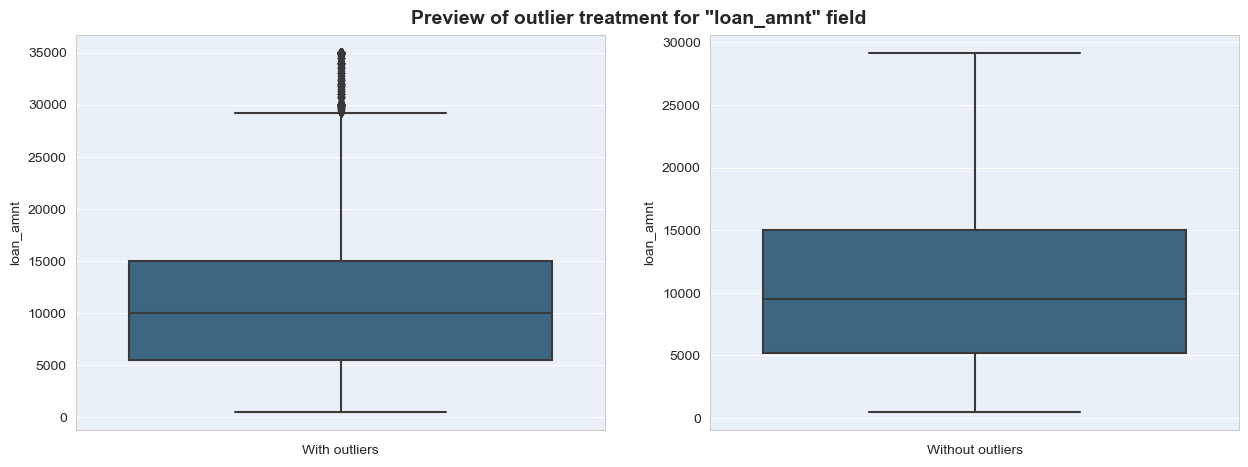

In [27]:
# Shows boxplot to compare data before and after removal of outliers
preview_outliers(df_loan, "loan_amnt")

As seen above, **loan_amnt** field has some outliers that must be removed to perform an accurate analysis

In [28]:
remove_outliers(df_loan, "loan_amnt")

Shape of dataframe before removing outliers: (36847, 18)
Shape of dataframe after removing outliers: (35769, 18)
Outliers for "loan_amnt" have been field removed!


**2.6.2 Evaluate funded_amnt field for outliers**

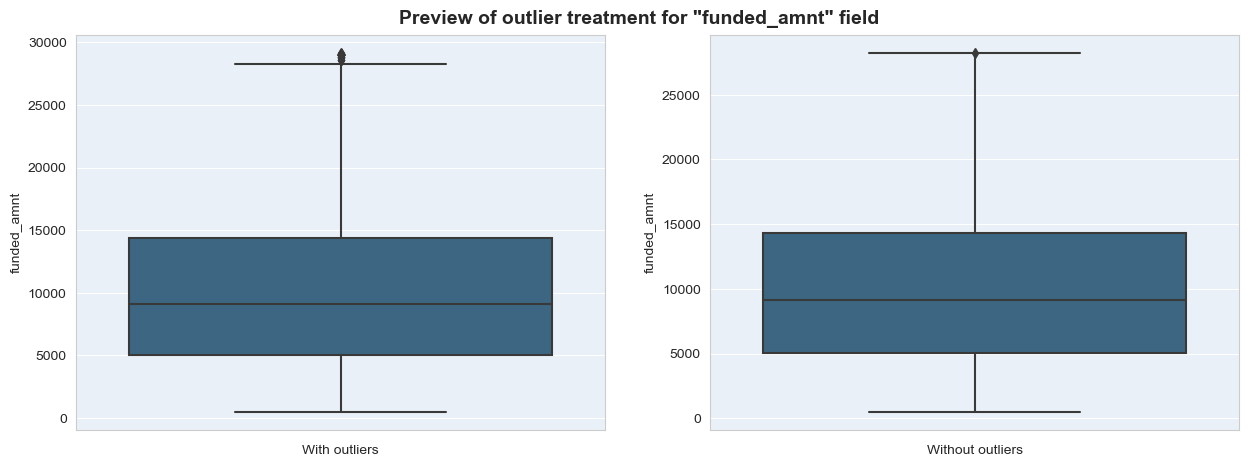

In [29]:
# See a preview of funded_amnt field with and without outliers removed
preview_outliers(df_loan, "funded_amnt")

As seen above, **funded_amnt** field has some outliers that must be removed to perform an accurate analysis

In [30]:
remove_outliers(df_loan, "funded_amnt")

Shape of dataframe before removing outliers: (35769, 18)
Shape of dataframe after removing outliers: (35739, 18)
Outliers for "funded_amnt" have been field removed!


**2.6.3 Evaluate funded_amnt_inv field for outliers**

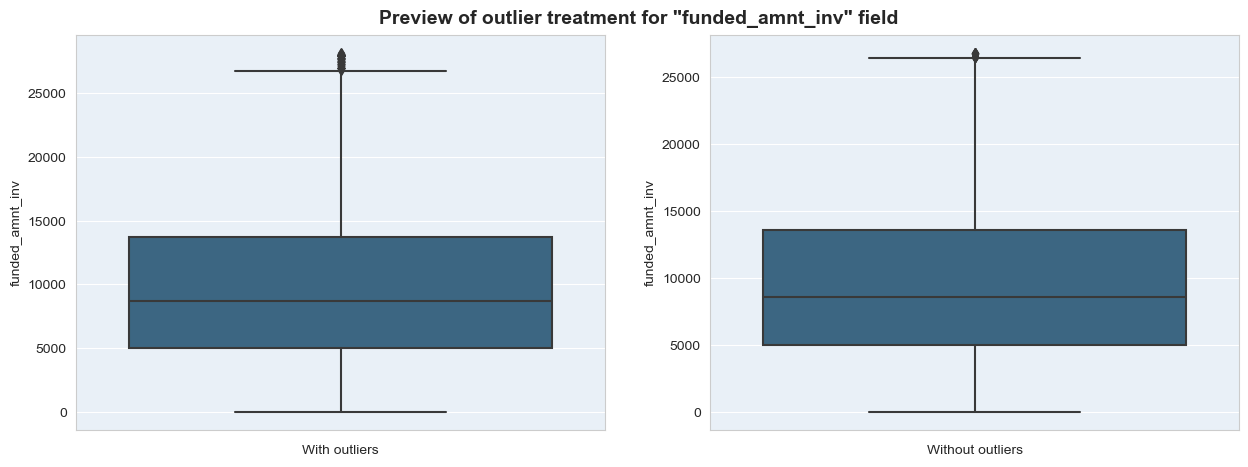

In [31]:
# See a preview of funded_amnt_inv field with and without outliers removed
preview_outliers(df_loan, "funded_amnt_inv")

As seen above, **funded_amnt** field has several outliers that must be removed to perform an accurate analysis

In [32]:
remove_outliers(df_loan, "funded_amnt")

Shape of dataframe before removing outliers: (35739, 18)
Shape of dataframe after removing outliers: (35738, 18)
Outliers for "funded_amnt" have been field removed!


**2.6.4 Evaluate int_rate field for outliers**

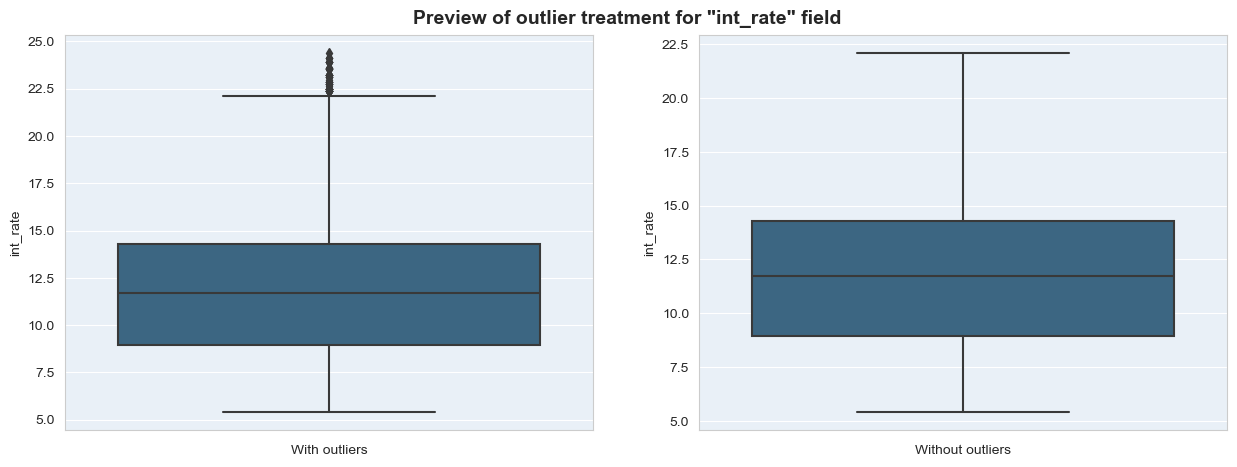

In [33]:
# See a preview of int_rate field with and without outliers removed
preview_outliers(df_loan, "int_rate")

As seen above, **int_rate** field has several outliers that must be removed to perform an accurate analysis

In [34]:
remove_outliers(df_loan, "int_rate")

Shape of dataframe before removing outliers: (35738, 18)
Shape of dataframe after removing outliers: (35674, 18)
Outliers for "int_rate" have been field removed!


**2.6.5 Evaluate installment field for outliers**

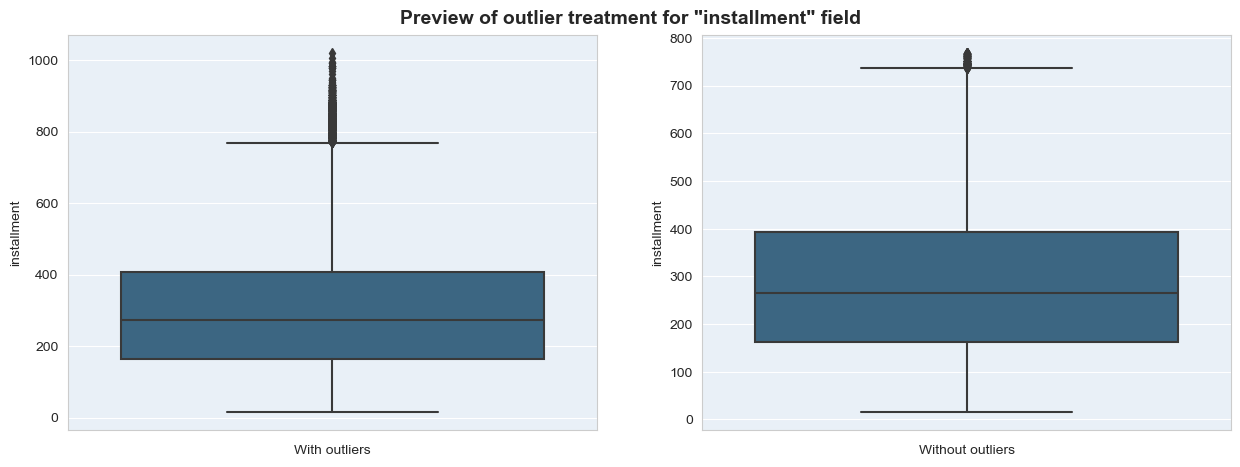

In [35]:
# See a preview of installment field with and without outliers removed
preview_outliers(df_loan, "installment")

As seen above, **installment** field has several outliers that must be removed to perform an accurate analysis

In [36]:
remove_outliers(df_loan, "installment")

Shape of dataframe before removing outliers: (35674, 18)
Shape of dataframe after removing outliers: (34635, 18)
Outliers for "installment" have been field removed!


**2.6.7 Evaluate annual_inc field for outliers**

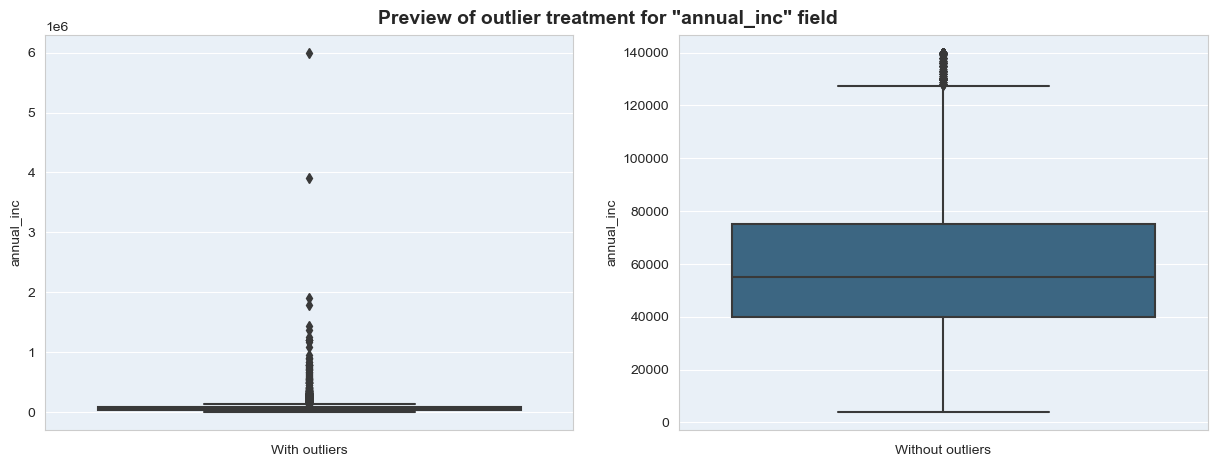

In [37]:
# See a preview of annual_inc field with and without outliers removed
preview_outliers(df_loan, "annual_inc")

As seen above, **annual_inc** field has several outliers that must be removed to perform an accurate analysis

In [38]:
remove_outliers(df_loan, "annual_inc")

Shape of dataframe before removing outliers: (34635, 18)
Shape of dataframe after removing outliers: (33272, 18)
Outliers for "annual_inc" have been field removed!


**2.6.8 Evaluate annual_inc field for outliers**

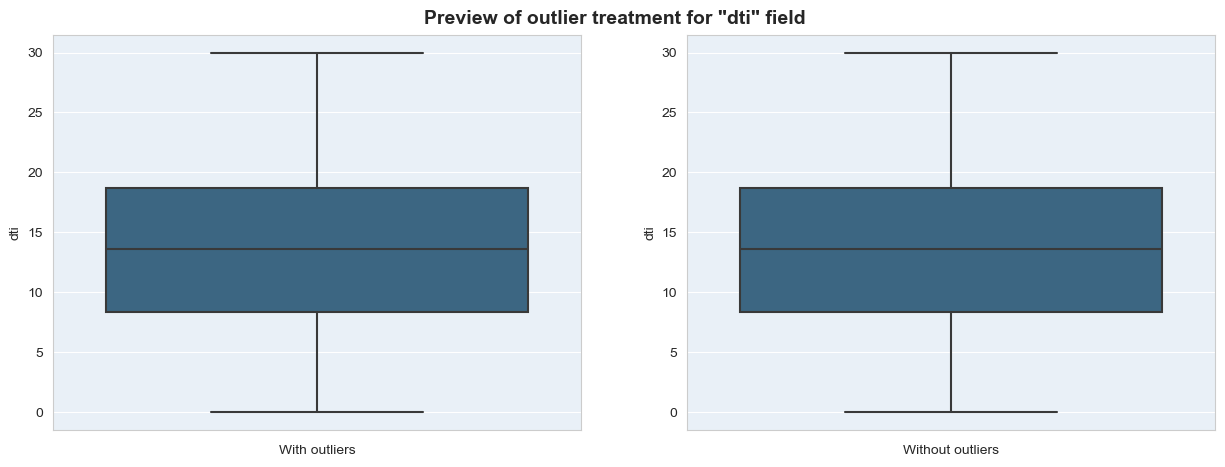

In [39]:
# See a preview of dti field with and without outliers removed
preview_outliers(df_loan, "dti")

We will **not treat dti** field for outliers as based on above boxplots it does not seem to have outliers

### 2.7 Clean or modify categorical fields

**2.7.1 Modify loan_status field**

For convenience use the terminlogies **Defaulted** and **Fully Paid** instead of **Charged Off** and **Fully Paid** respectively.

In [40]:
df_loan['loan_status'] = df_loan['loan_status'].apply(lambda x: 'Defaulted' if x=="Charged Off" else x)

**2.7.2 Sort dataset by issue_d**
This will make analysis reports much easier to read

In [41]:
df_loan = df_loan.sort_values(by='issue_d')

**2.7.3 Derive year and month fields**
We will use year and month based analysis during data analysis phase

In [42]:
# Derive year from issue_d field
df_loan['issue_year'] = df_loan['issue_d'].dt.year

# Derive month from issue_d field
# df_loan['issue_month'] = df_loan['issue_d'].dt.month
df_loan['issue_month'] = df_loan['issue_d'].dt.strftime('%B')

## 3. Data Analysis
---

Define some utility functions that we will be used on this section

In [193]:
def plot_frequency(df, field):
    value_counts = df[field].value_counts()
#     sns.set_palette('viridis', n_colors=len(value_counts))
#     sns.set_style("whitegrid", {'axes.facecolor': '#e9f0f7', 'grid.color': 'white'})
    fig, (ax1, ax2)  = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw={'top': 0.88})
    sns.countplot(data=df, x=field, ax=ax1)
    for p in ax1.patches:
        ax1.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    ax1.set_xlabel(f"Bar chart of {field}")
    value_counts.sort_values().plot.pie(autopct='%1.1f%%',shadow=True, textprops={'fontsize': 12, 'color': 'white'}, ax=ax2) 

    ax2.set_xlabel(f"Pie chart of {field}")
    title = fig.suptitle(f'Preview of outlier treatment for "{field}" field', fontsize=14, fontweight='bold', ha='center')
    title.set_y(0.93)
    plt.tight_layout()
    fig.show()
    
def plot_frequency_multiple(df, fields, log_yscale = False, order = {}):
    num_fields = len(fields)
    num_rows = int(np.ceil(num_fields / 2))
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))
    axes = axes.flatten()
    for i, field in enumerate(fields):
        ax = axes[i]  # Select the appropriate subplot
        sns.countplot(data=df, x=field, ax=ax, order=order.get(field, None))  # Plot the countplot
        ax.set_title(f"{field}")
        if log_yscale:
            ax.set_yscale("log")

        if len(ax.get_xticklabels()) > 10:
            ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.tight_layout()
    fig.show()
    
    
def plot_frequency_single(df, field, log_yscale = False):
    plt.figure(figsize=(12, 3))  # Adjust the width and height as desired
    ax = sns.countplot(data=df, x=field)
    if log_yscale:
        ax.set_yscale("log")
    plt.xticks(rotation=90)
    plt.show()
    

def plot_frequency_pivot(df, index, columns, order = None, ax=None):
    pivot_table = pd.pivot_table(df, index=index, columns=columns, aggfunc='size', fill_value=0)
    if order:
        pivot_table = pivot_table.reindex(index=order)
    normalized_table = pivot_table.div(pivot_table.sum(axis=1), axis=0)
    normalized_table.plot(kind='bar', stacked=True, ax=ax)
    plt.xlabel(index)
    plt.ylabel('Ratio')
    if ax:
        ax.set_title(f'Pivot: {index} vs {columns}')
    else:
        plt.title(f'Pivot: {index} vs {columns}')
        plt.show()
    
def plot_frequency_pivot_multiple(df, fields, columns, order = None):
    num_fields = len(fields)
    num_rows = int(np.ceil(num_fields / 2))
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))
    axes = axes.flatten()
    for i, field in enumerate(fields):
        ax = axes[i] 
        plot_frequency_pivot(df, field, columns, order=order.get(field, None), ax=ax)
    plt.tight_layout()
    fig.show()

def plot_univariate_numeric(df, field1, field2, bins):
    fig, (ax1, ax2)  = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw={'top': 0.88})
    sns.histplot(data=df, x=field1, bins=bins, kde=True, element="bars", ax=ax1)
    ax1.set_xlabel(f"Histogram of {field1}")
    sns.boxplot(df, x=field2, y=field1)
    ax2.set_xlabel(f"Boxplot of {field1} comparision of {field2}")
    title = fig.suptitle(f'Univariate analysis of "{field1}" field', fontsize=14, fontweight='bold', ha='center')
    title.set_y(0.93)
    plt.tight_layout()
    fig.show()
    
def plot_bivariate_heatmap(df, field1, field2, field3, ax = None):
    grouped_data = df.groupby([field1, field2])[field3].mean().reset_index()
    pivot_table = grouped_data.pivot(index=field1, columns=field2, values=field3)
    sns.heatmap(pivot_table, annot=True, cmap='crest', fmt='.2f', cbar_kws={'label': field3}, ax=ax)
    plt.xlabel(field2)
    plt.ylabel(field1)
    if ax:
        ax.set_title(f'Impact of {field1} and {field3} on {field2}')
    else:
        plt.title(f'Impact of {field1} and {field3} on {field2}')
        plt.show()
    
def plot_bivariate_heatmap_multiple(df, indices, columns, values):
    num_fields = len(indices)
    num_rows = int(np.ceil(num_fields / 2))
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))
    axes = axes.flatten()
    for i, field in enumerate(indices):
        ax = axes[i] 
        plot_bivariate_heatmap(df, field, columns, values, ax=ax)
    plt.tight_layout()
    fig.show()


### 3.1 Univariate Analsysis 

**3.1.1 Univariate analsysis on target field (loan_status)** 

Compare the number of loans that were **Fully Paid** vs number of loans that **Defaulted**

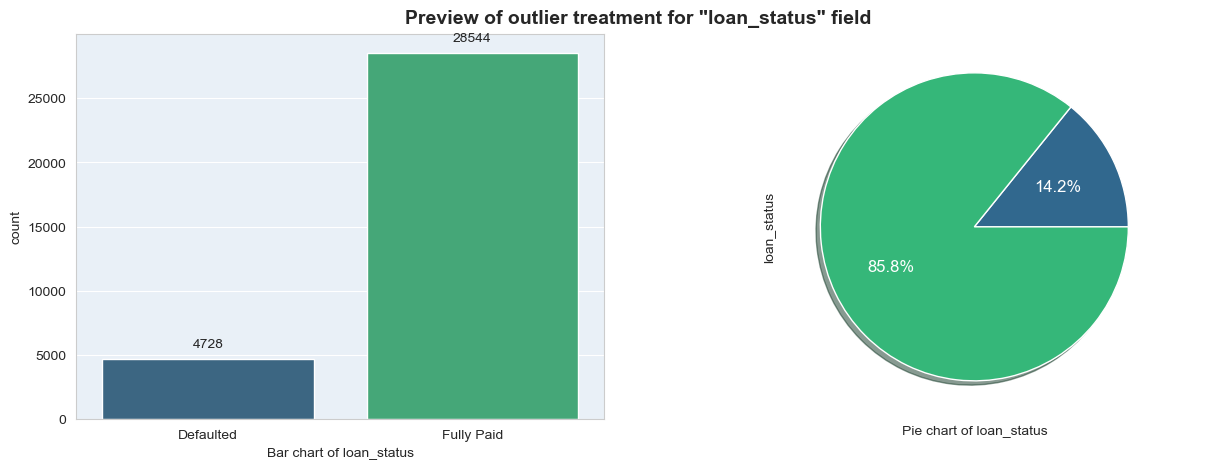

In [44]:
# Analyse the loan_status by observing its frequency chart
plot_frequency(df_loan, 'loan_status')

**Observations:**

* Significantly more loans are *fully paid* when compared to *defaulted* loans
* This result can be expected because the dataset contain loans that went though Lending Club approval process which tries to reduce loans that could potentially default

**3.1.2 Univariate analsysis on categorical variables** 

**Part 1:** Analyse **purpose**, **term**, **issue_year**, **grade** and **sub_grade**

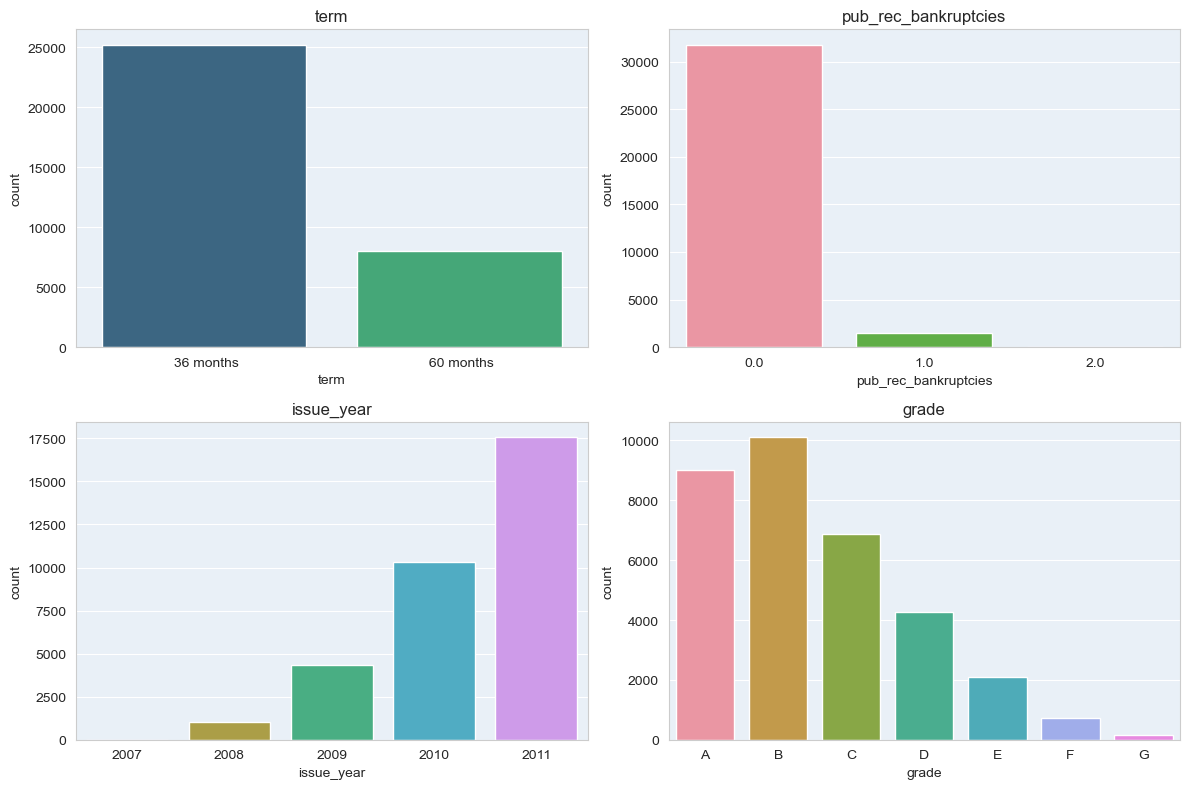

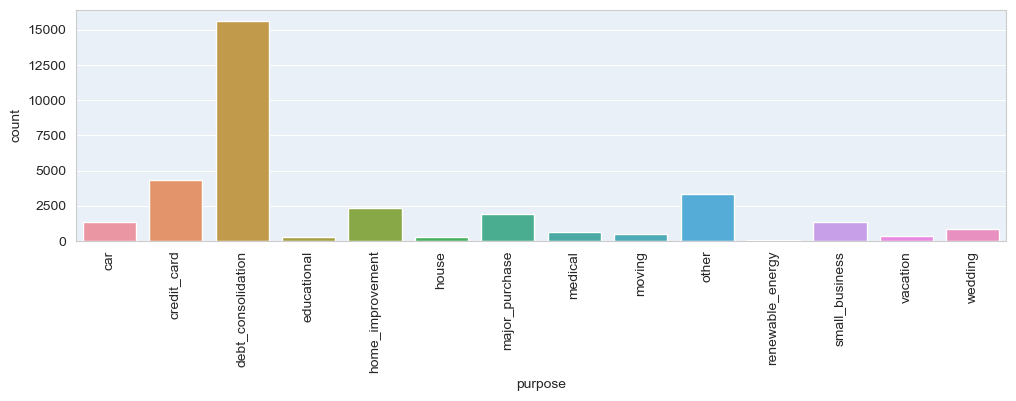

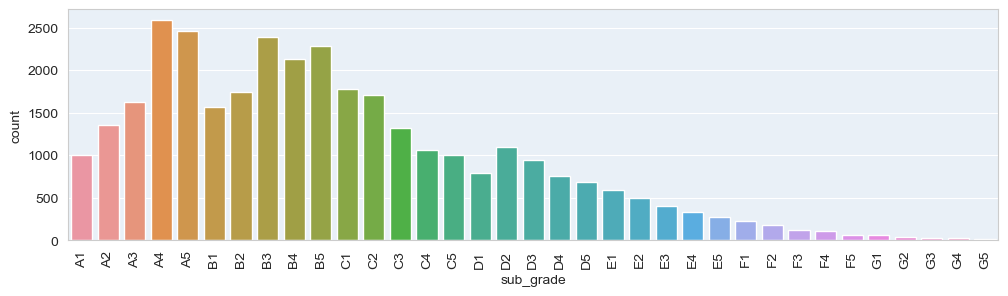

In [45]:
plot_frequency_multiple(df_loan, ['term', 'pub_rec_bankruptcies','issue_year', 'grade'])
plot_frequency_single(df_loan, 'purpose')
plot_frequency_single(df_loan, 'sub_grade')

**Observations:** 

- Majority of loan is given for the purpose of debt consolidation followed by credit card and others
- Most borrowers has zero number of public record bankruptcies
- Signficantly more loan has 36 months term compared to loan having 60 months term
- Number of loans issued is rising over the years
- Mostly Grade B loans, closely followed by A grade and then ever decreasing number of loans for lower grades 
- Sub-grade just appears to be an expansion of Grade

**Part 2:** Analyse **emp_length**, **home_ownership**, **verification_status**, **issue_month** and **addr_state**

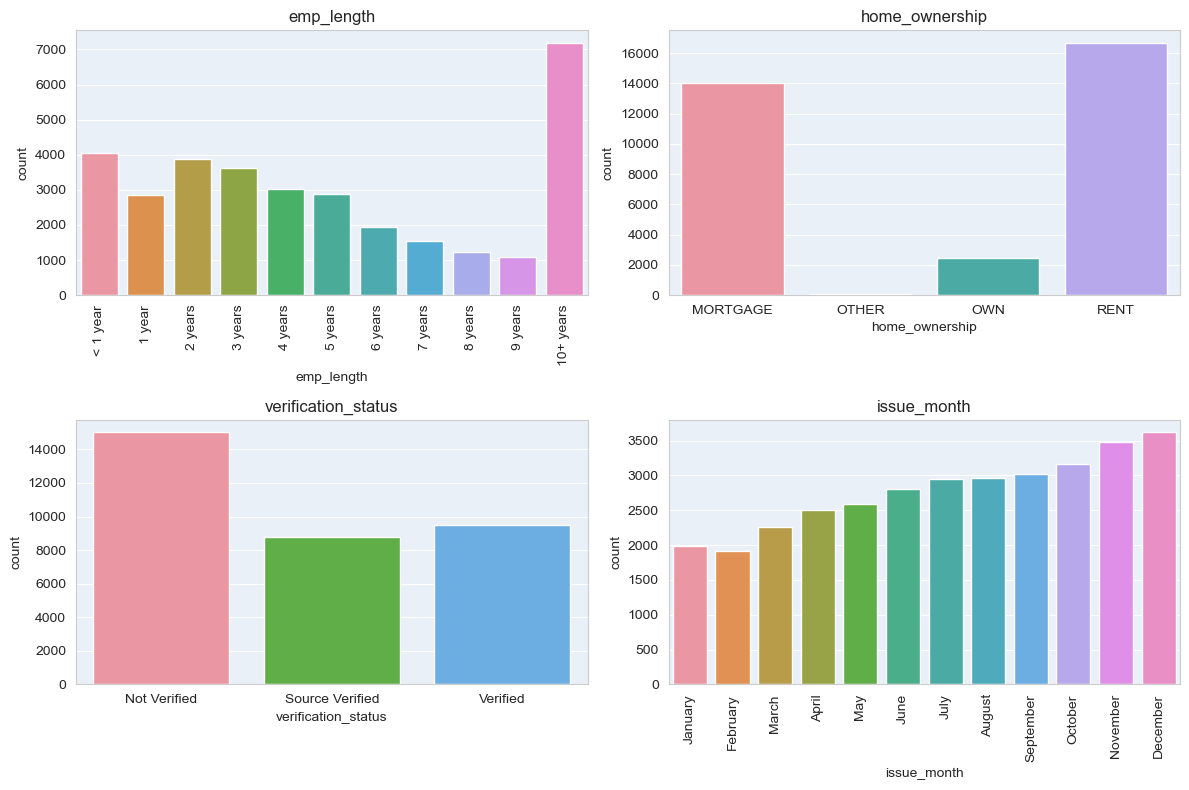

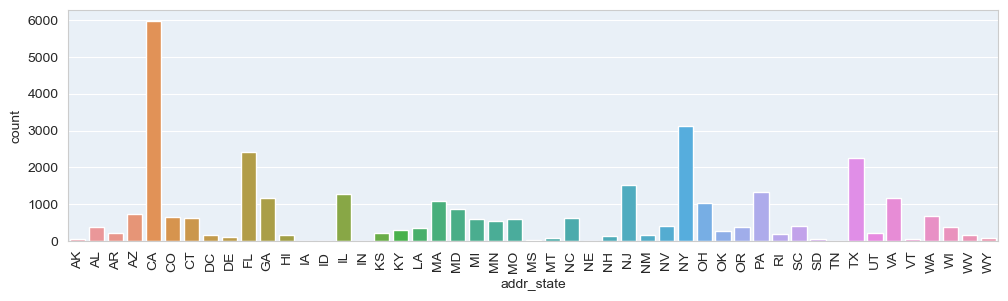

In [46]:
month_order = ['January', 'February', 'March', 'April', 
               'May', 'June', 'July', 'August', 
               'September', 'October', 'November', 'December']
emp_length_order = ['< 1 year', '1 year', '2 years', '3 years', 
                    '4 years', '5 years', '6 years', '7 years', 
                    '8 years', '9 years', '10+ years']
plot_frequency_multiple(df_loan, ['emp_length', 'home_ownership', 'verification_status', 'issue_month'], 
                         order = {"issue_month": month_order, 'emp_length': emp_length_order})
plot_frequency_single(df_loan, 'addr_state', False)

**3.1.3 Univariate analsysis on categorical field using Pivot table** 

**Part 1:** Use Pivot table to analyze **term**, **grade**, **emp_length** and **purpose** against **loan_status**

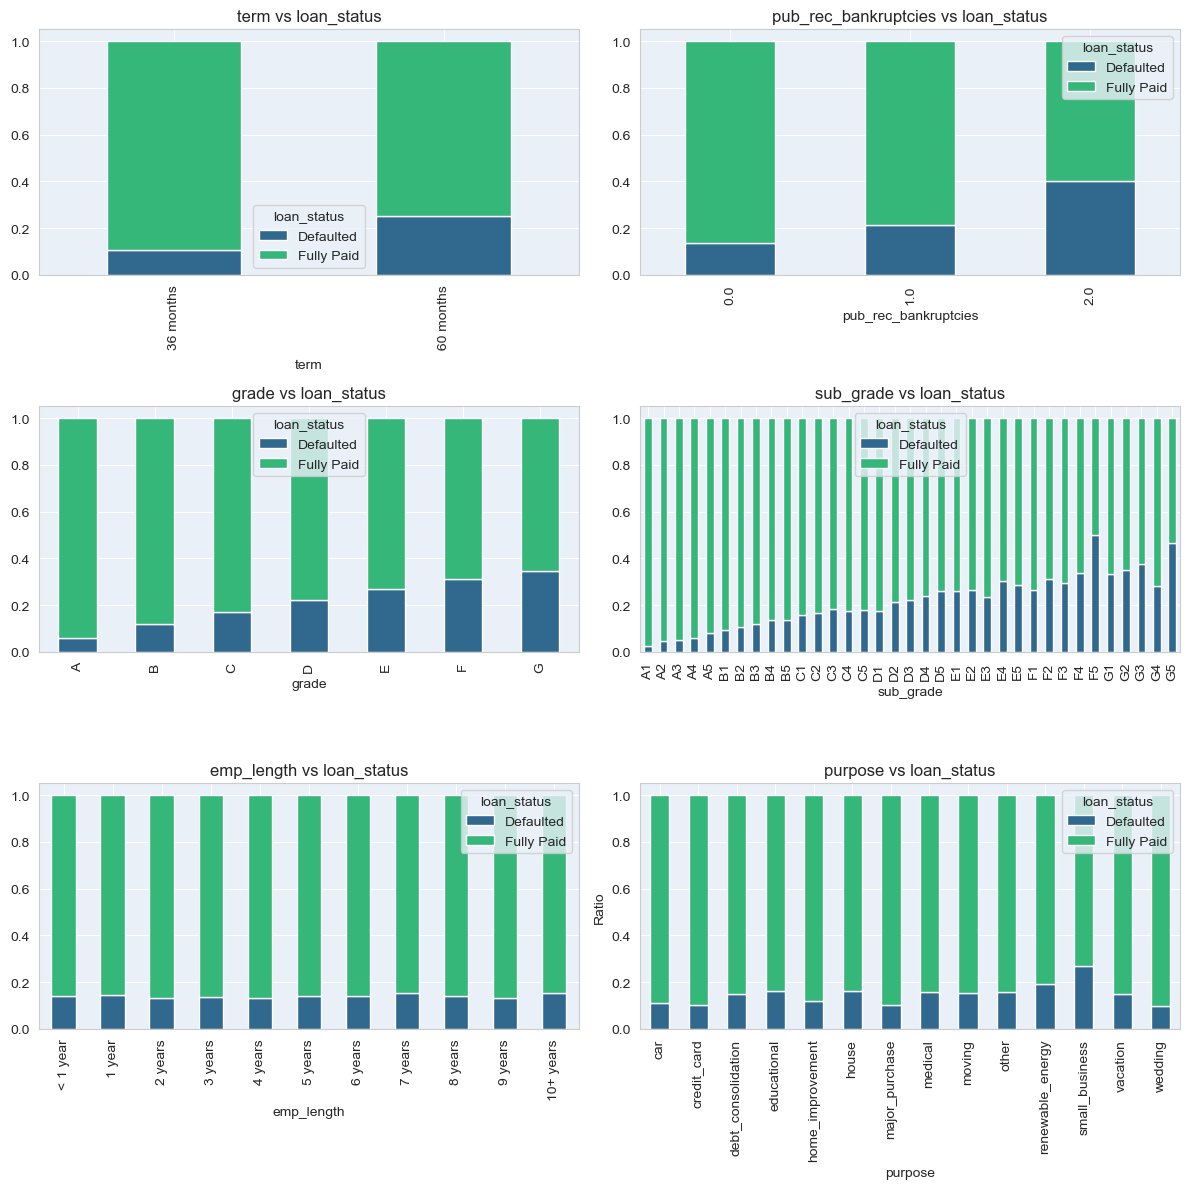

In [191]:
plot_frequency_pivot_multiple(df_loan, ['term', 'pub_rec_bankruptcies', 'grade', 'sub_grade' , 'emp_length', 'purpose'], 'loan_status', order = {'emp_length': emp_length_order})

**Observations:** 

- 60 months term loans has higher ratio defaults than 36 months term loans
- As loan grades (or sub_grades) worsens ratio of defaults increase
- Small business loans has slightly higher ratio of defaults
- Noticably higher chance of defaulting if pub_rec_bankruptcies is more than 0

**Part 2:** Use Pivot table to analyze **home_ownership**, **verification_status**, **issue_year** and **issue_month** against **loan_status**

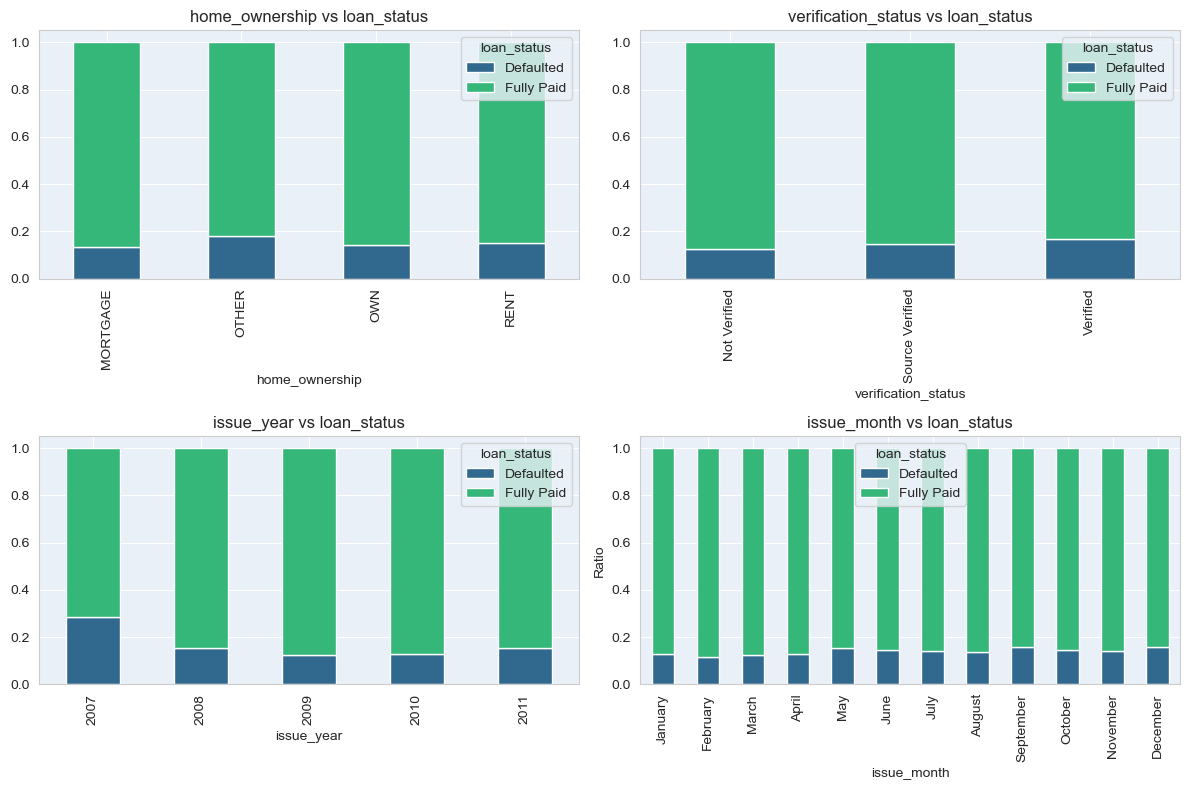

In [192]:
plot_frequency_pivot_multiple(df_loan, ['home_ownership', 'verification_status', 'issue_year', 'issue_month'], 'loan_status', order = {"issue_month": month_order})

**Observations:** 

- Loans given during 2007 and in general earlier years has more default
- Loans given during towards mid or end of year has slightly higher ratio of defaults

**3.1.4 Univariate analsysis of int_rate** 

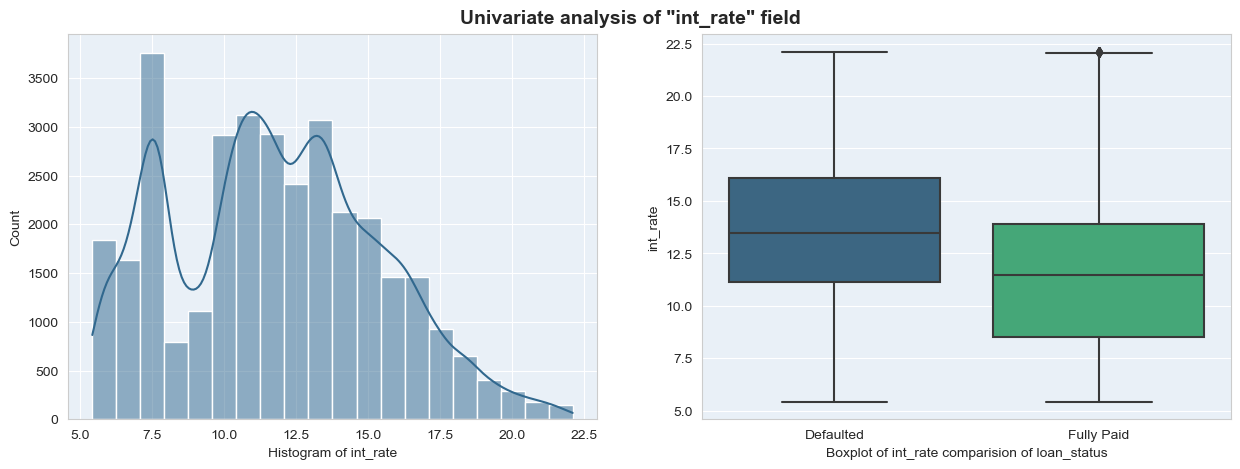

In [49]:
plot_univariate_numeric(df_loan, 'int_rate', 'loan_status', 20)

**Observations:** 
- Most interest rates is around 7.5% but after that it is mostly concentrated around 10% to 14%
- More loans default when interest rates are higher

**3.1.4 Univariate analsysis of loan_amt, funded_amnt and funded_amnt_inv** 

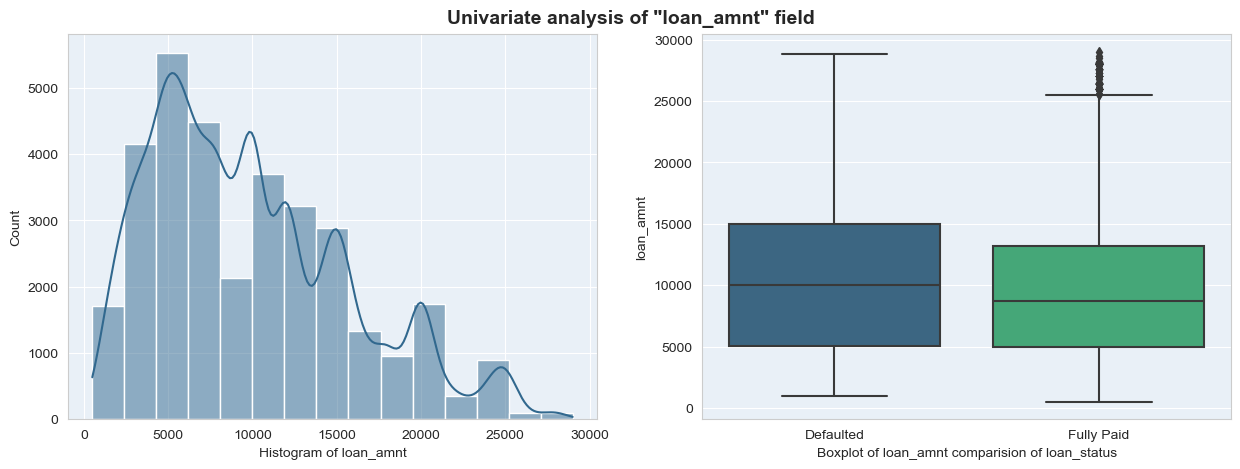

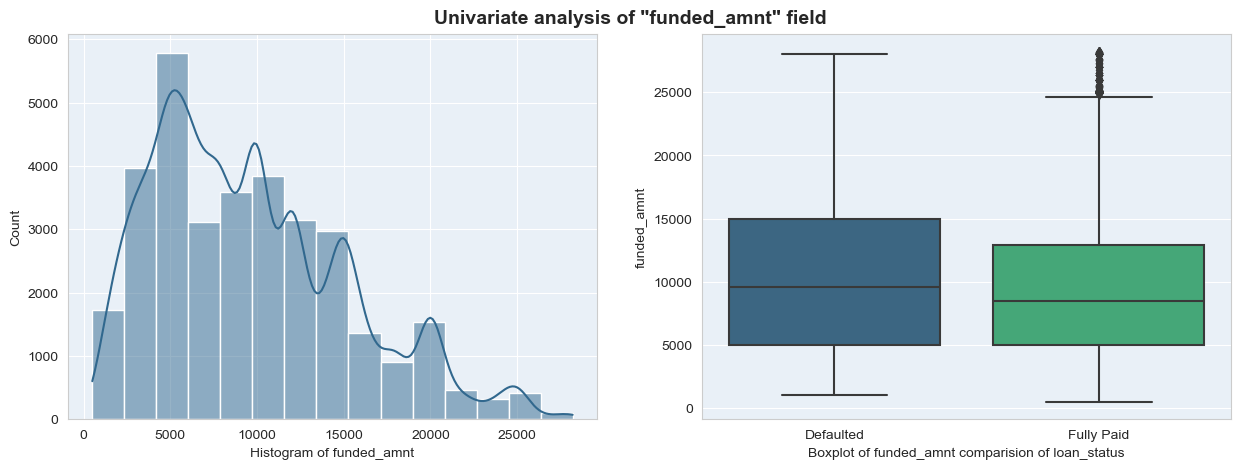

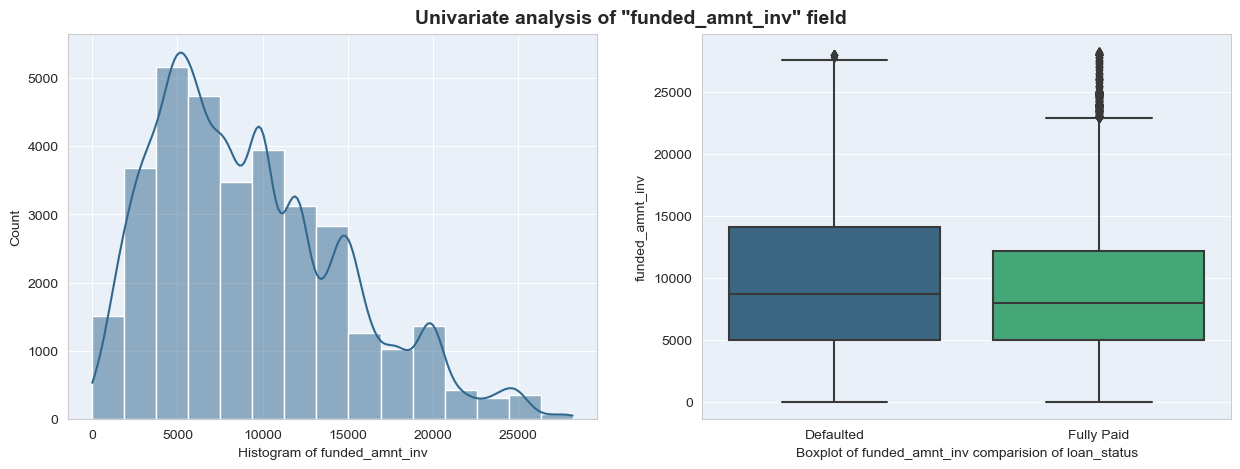

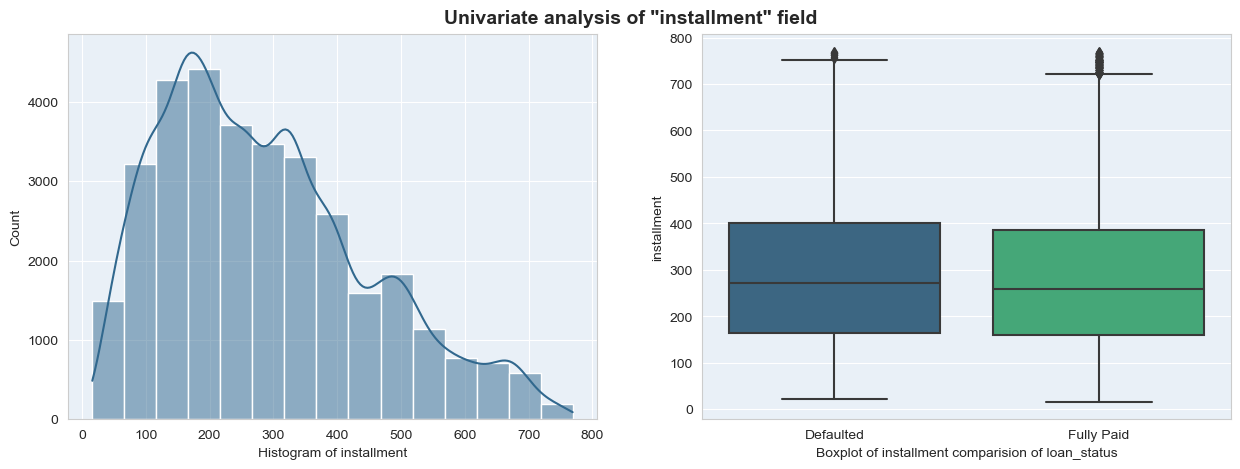

In [50]:
# Numerical Fields: loan_amnt, funded_amnt, funded_amnt_inv, int_rate, installment, annual_inc, dti
plot_univariate_numeric(df_loan, 'loan_amnt', 'loan_status', 15)
plot_univariate_numeric(df_loan, 'funded_amnt', 'loan_status', 15)
plot_univariate_numeric(df_loan, 'funded_amnt_inv', 'loan_status', 15)
plot_univariate_numeric(df_loan, 'installment', 'loan_status', 15)

**Observations:**
- Left skewed data for all of loan_amt, funded_amnt and funded_amnt_inv and installment
- In all cases, tendency to have more loans default when amount is higher

**3.1.4 Univariate analsysis of annual_inc and dti** 

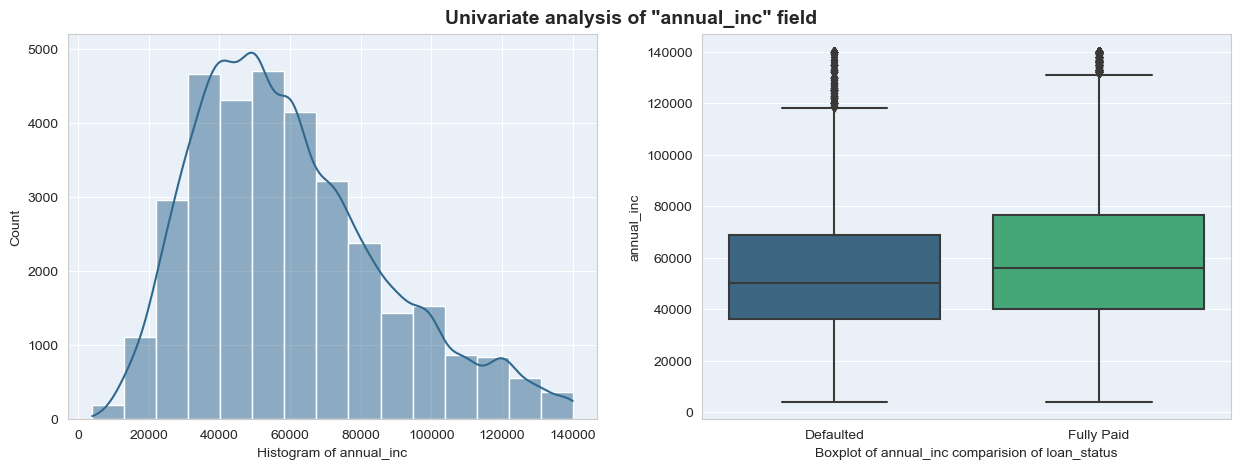

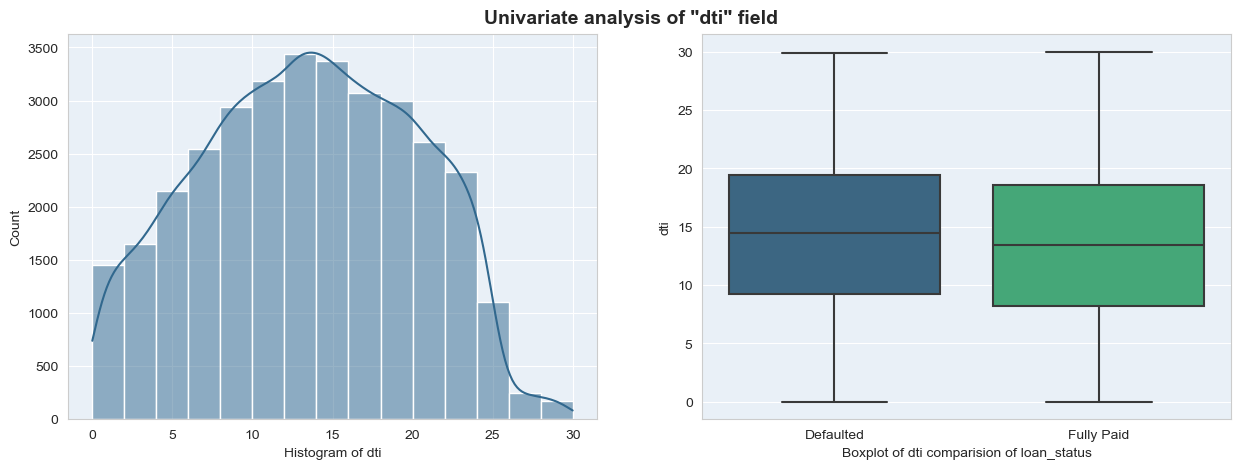

In [51]:
plot_univariate_numeric(df_loan, 'annual_inc', 'loan_status', 15)
plot_univariate_numeric(df_loan, 'dti', 'loan_status', 15)

**Observations:**
- Fairly normal distribution for both annual_inc and dti
- Annual income range is mostly between 30,000 to 80,000
- Lower rate of defaults when annual_inc is higher
- Lower rate of defaults when dti is lower


### 3.2 Bivariate Analsysis 

Next we will use bivariate analysis explore the relationships between some interesting pairs of variables that have been picked based on Univariate analysis.

**3.2.1 Analyze thecorrelation of all numerical fields** 

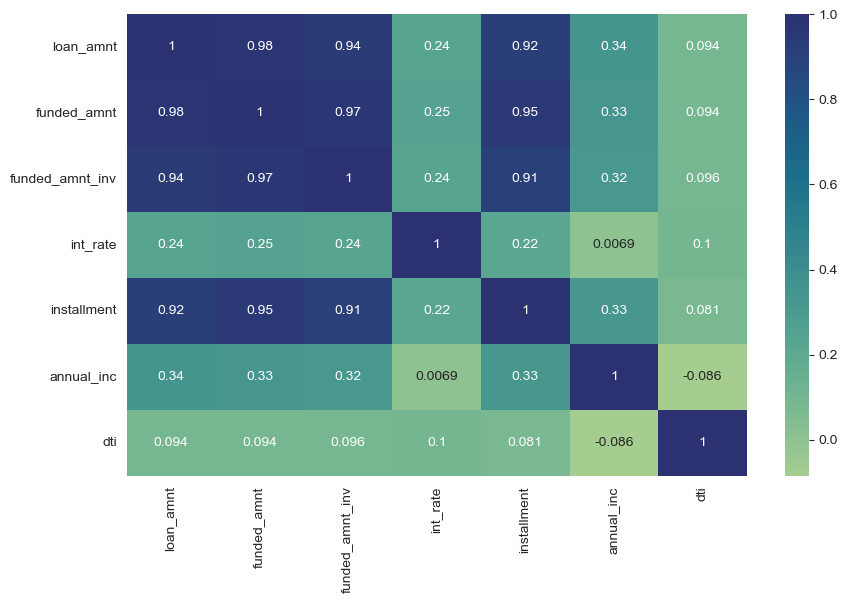

In [52]:
# Generate correlation matrix

plt.figure(figsize=(10, 6))  # Adjust the width and height as desired
corr_matrix = df_loan[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 
        'installment', 'annual_inc', 'dti']].corr()
# Plot the matrix on a heatmap
# sns.heatmap(corr_matrix, annot=True, cmap='crest')
plt.show()

**Observations:**
- **loan_amnt**, **funded_amnt** and **funded_amnt_inv** and **installment** are highly correlated. We can take any one of these variables for doing other bivariate analysis
- Other fields do not look very correlated

**3.2.2 Create bins for some of the numerical variables** 

- Use **pd.cut** to derive categorical variables from numerical variables

In [137]:
# Bins for interest rate
int_rate_bins = [0, 5, 10, 15, 20, 100]
int_rate_labels = ["Less than 5%", "5% to 10%", "10% to 15%", "15% to 20%",  "Over 20%"]
df_loan['int_rate_bins'] = pd.cut(df_loan['int_rate'], bins=int_rate_bins, labels=int_rate_labels)


# Bins for loan amount
loan_amnt_bins = [0, 1500, 5000, 15000, 25000, 1000000]
loan_amnt_labels = ["Less than 1500", "1,500 to 5,000", "5,000 to 15,000", "15,000 to 25,000",  "25,000+"]
df_loan['loan_amnt_bins'] = pd.cut(df_loan['loan_amnt'], bins=5) #, labels=loan_amount_labels)

# Bins for annual income
annual_inc_bins = [0, 30000, 40000, 50000, 60000, 80000, 1000000]
annual_inc_labels = ["Less than 30,000", "30,000 to 40,000", "40,000 to 50,000", "50,000 to 60,000",  "60,000 to 80,000", "80,000+"]
df_loan['annual_inc_bins'] = pd.cut(df_loan['annual_inc'], bins=annual_inc_bins, labels=annual_inc_labels)


**3.2.3 Impact of interest rate on loan status** 

Impact of interest rate on loan status across **loan amount**, **annual income**, **purpose**, **home_ownership**

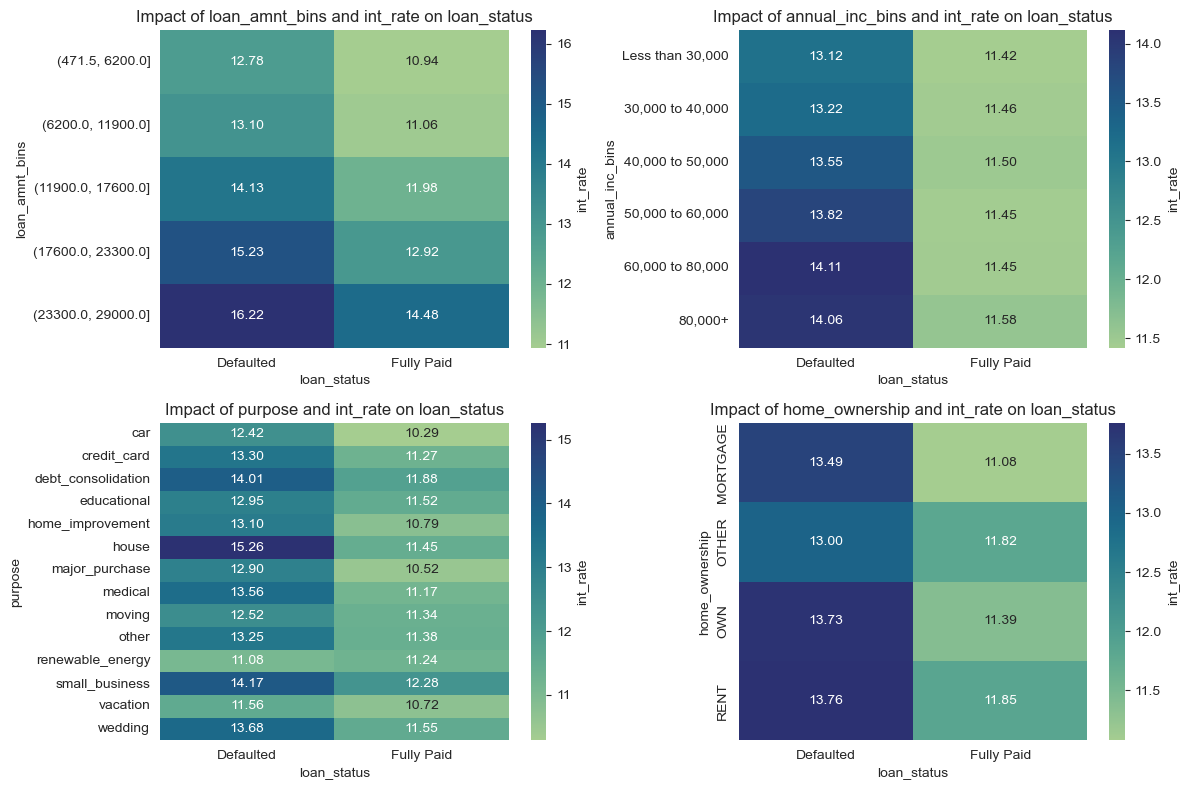

In [189]:
plot_bivariate_heatmap_multiple(df_loan,['loan_amnt_bins', 'annual_inc_bins', 'purpose', 'home_ownership'], 'loan_status', 'int_rate')

**Observations:**

- Higher interest rates is correlated with higher number of loan defaults across loan amount ranges, annual income ranges, purposes, home ownership types

**3.2.4 Impact of dti on loan status** 

Impact of dti on loan status across **loan amount**, **employment length**, **purpose**, **home_ownership**

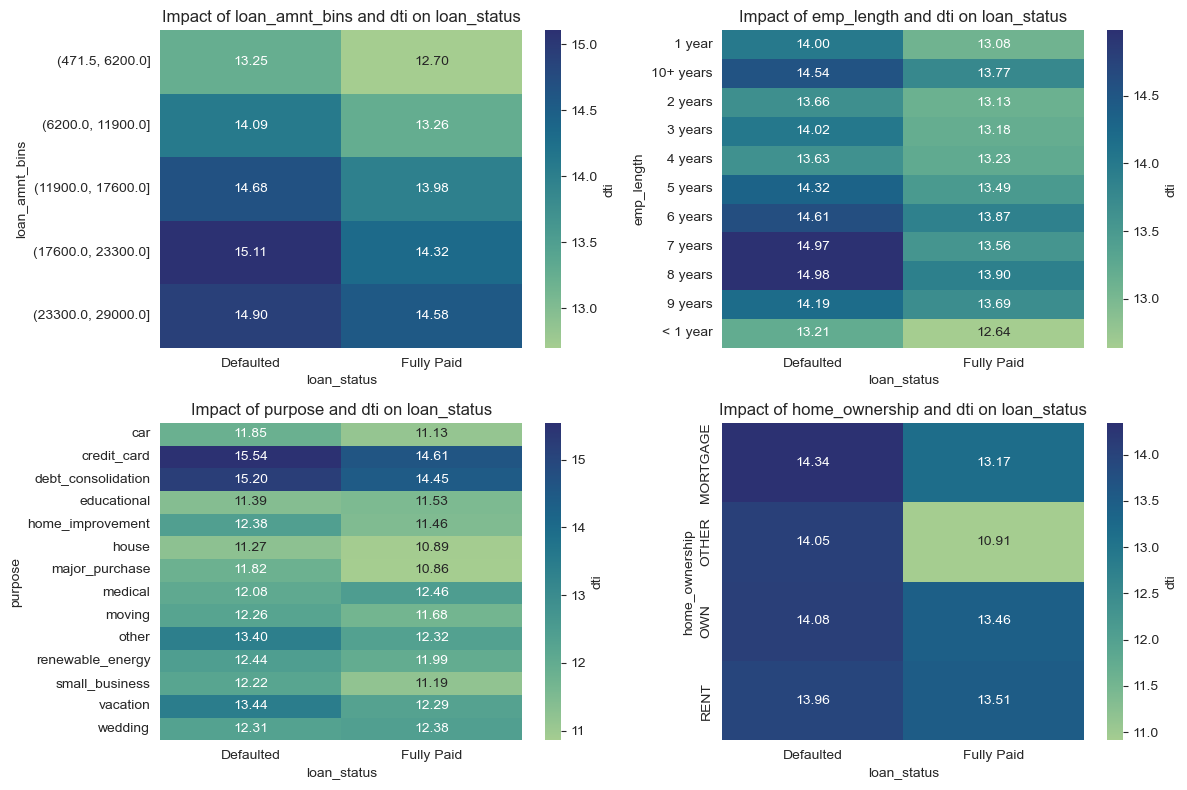

In [204]:
plot_bivariate_heatmap_multiple(df_loan,['loan_amnt_bins', 'emp_length', 'purpose', 'home_ownership'], 'loan_status', 'dti')

**Observations:**

- Higher dti (debt to income) is correlated with higher number of loan defaults across loan amount ranges, annual income ranges, purposes, home ownership types

**3.2.5 Impact of annual income on loan status** 

Impact of interest rate on loan status across **loan amount**, **emp_length**, **purpose**, **home_ownership**

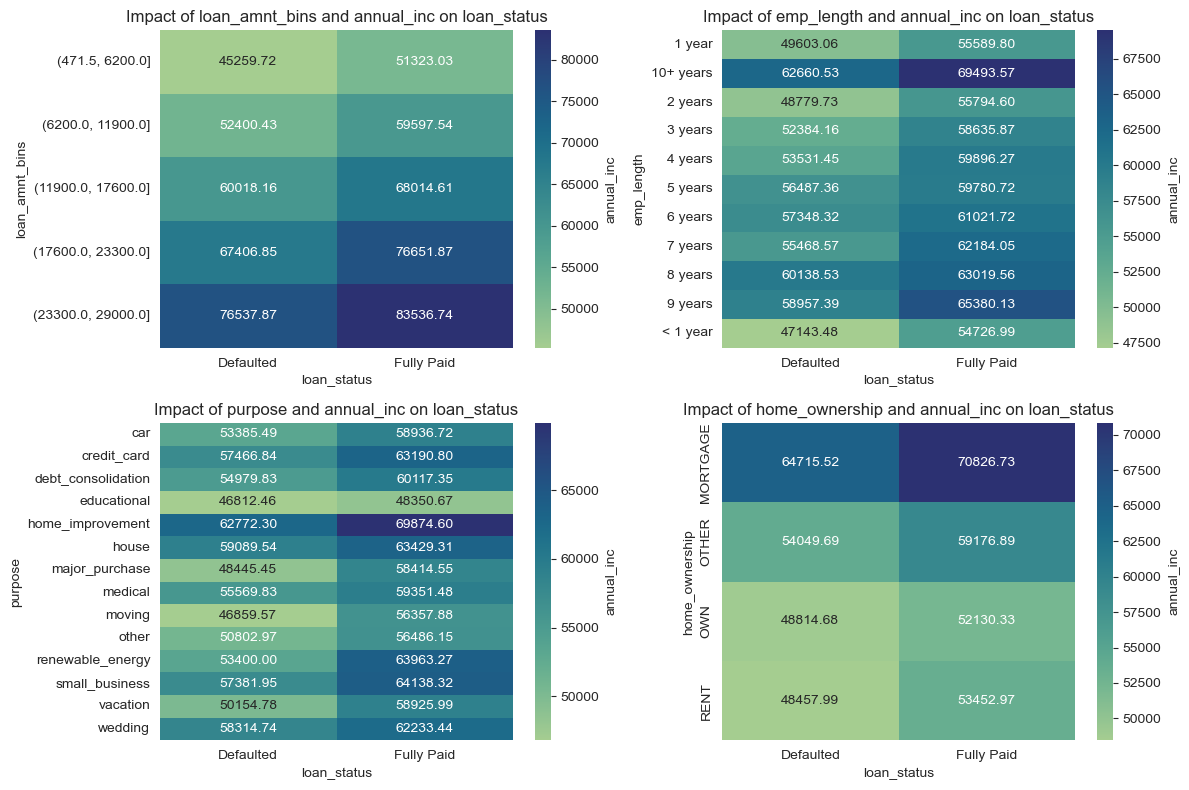

In [208]:
plot_bivariate_heatmap_multiple(df_loan,['loan_amnt_bins', 'emp_length', 'purpose', 'home_ownership'], 'loan_status', 'annual_inc')

**Observations:**

- Higher annual income correlated with lower number of loan defaults across loan amount ranges, annual income ranges, purposes, home ownership types


## 4. Recommendations
<hr/>

**4.1 Summary:**

The main observations so far are as follows:
- Significantly more loans are *fully paid* when compared to *defaulted* loans
- Lower rate of loan becoming default when annual_inc is higher
- Lower rate of loan becoming default when dti is lower
- In all cases, tendency to have more loans default when either of loan_amt, funded_amnt and funded_amnt is higher
- Most interest rates is around 7.5% but after that it is mostly concentrated around 10% to 14%
- More loans default when interest rates are higher
- 60 months term loans has higher ratio defaults than 36 months term loans
- Lower grade loans have higher ratio of defaults increase
- Small business loans has slightly higher ratio of defaults
- Majority of loan is given for the purpose of debt consolidation followed by credit card and others
- Signficantly more loan has 36 months term compared to loan having 60 months term
- Number of loans issued is rising over the years
- Mostly Grade B loans, closely followed by A grade and then ever decreasing number of loans for lower grades 
- Noticably higher chance of defaulting if pub_rec_bankruptcies is more than 0
- Most borrowers has zero number of public record bankruptcies
- **loan_amnt**, **funded_amnt** and **funded_amnt_inv** and **installment** are highly correlated. 
- Higher interest rate (debt to income) is correlated with higher number of loan defaults across loan amount ranges, annual income ranges, purposes, home ownership types
- Higher dti (debt to income) is correlated with higher number of loan defaults across loan amount ranges, annual income ranges, purposes, home ownership types
- Higher annual income correlated with lower number of loan defaults across loan amount ranges, annual income ranges, purposes, home ownership types


**4.1 Final Recommendations:**
    
The driving factors behind loan default include the following variables:
1. Borrower has low salary
2. Loan amount is high
3. Interest rate is high
4. 60 months term instead of 30 months term
5. Lower Grade loans
6. Loan type of Small Business
7. Borrower has been bankrupt before
8. Higher dti

One of more combination of above conditions strongly indicate that the loan will default.